# Construção do modelo com dados históricos da Operadora de saúde

## Cenário atual
#### A partir da base de dados com cerca de 50 mil registros faremos a análise e um modelo que nos permita entender se o paciente que chega, terá a tendencia a ficar muito ou pouco tempo no hospital

##### Antes da análise, aplicaremos as regras definidas pela operadora de saúde sobre nossos dados, são elas:
- Tempo de permanência até 2 dias é CURTO, entre 2 e 7 dias é MEDIO e acima de 7 dias é LONGO
- CID com tempo médio de permanência até 7 dias Baixa Complexidade acima de 7 dias Alta complexidade

Começaremos nossa preparação, análise e treinamento de modelo, importando nossos dados e aplicando as regras prédeterminadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds_pacients = pd.read_excel('COLECISTECTOMIA.xlsx')

ds_pacients.describe()
ds_pacients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52767 entries, 0 to 52766
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CARATER            51234 non-null  object 
 1   CID                52766 non-null  object 
 2   DIAGNOSTICO        52755 non-null  object 
 3   IDADE              52766 non-null  float64
 4   GENERO             52766 non-null  object 
 5   tempo_permanencia  52767 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 2.4+ MB


In [3]:
ds_pacients.head()

,CARATER,CID,DIAGNOSTICO,IDADE,GENERO,tempo_permanencia
0,Elective,K810,149 Biliary tract disease,46.0,Feminino,1
1,Elective,K805,149 Biliary tract disease,29.0,Feminino,1
2,Elective,K811,149 Biliary tract disease,29.0,Feminino,1
3,Elective,K80,149 Biliary tract disease,41.0,Masculino,0
4,Elective,K811,149 Biliary tract disease,45.0,Feminino,1


Aplicando as regras definidas por nossa Operadora de saúde

In [4]:
#verificando dados nulos
ds_pacients.isnull().sum()

CARATER              1533
CID                     1
DIAGNOSTICO            12
IDADE                   1
GENERO                  1
tempo_permanencia       0
dtype: int64

Por conta dos dados nulos representarem uma parcela muito baixa dos nossos dados, eles serão removidos.

In [5]:
clean_data = ds_pacients.dropna()

qtd_dados_limpos = len(ds_pacients) - len(clean_data) 

qtd_dados_limpos

1544

Agora sem os dados nulos que faziam parte da nossa base vamos aplicar as regras.

Aplicando classificação do tempo de permanencia em Curto, Médio e Longo com base na quantidade de dias registradas

In [6]:
#Aplicando regra na coluna tempo_permanencia
clean_data['tempo_permanencia'] = clean_data['tempo_permanencia'].apply(lambda x: 'Curto' if x <= 2 else 'Medio' if x <= 7 else 'Longo')

clean_data['tempo_permanencia'].unique()

C:\Users\lucas\AppData\Local\Temp\ipykernel_22392\1761234461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['tempo_permanencia'] = clean_data['tempo_permanencia'].apply(lambda x: 'Curto' if x <= 2 else 'Medio' if x <= 7 else 'Longo')


array(['Curto', 'Medio', 'Longo'], dtype=object)

Realizando agrupamento de CID por tempo médio de permanencia nas classificações Baixa complexidade e Alta complexidade


In [7]:
#Aplicando conveção dos CIDS, Alta complexidade  / Baixa complexidade 
clean_data.loc[(clean_data['tempo_permanencia'] == 'Curto') | (clean_data['tempo_permanencia'] == 'Medio'), 'CID'] = 'Baixa complexidade'
clean_data.loc[clean_data['tempo_permanencia'] == 'Longo', 'CID'] = 'Alta complexidade'

clean_data['CID'].unique()

array(['Baixa complexidade', 'Alta complexidade'], dtype=object)

Analisando distribuição dos dados pela idade

(array([  127.,   994.,  6875., 15274., 12905.,  9268.,  3904.,  1545.,
          311.,    20.]),
 array([  1. ,  11.4,  21.8,  32.2,  42.6,  53. ,  63.4,  73.8,  84.2,
         94.6, 105. ]),
 <BarContainer object of 10 artists>)

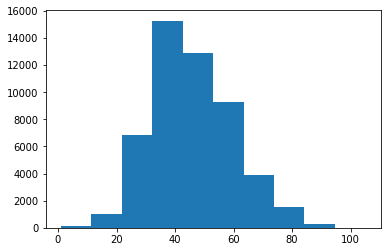

In [8]:
plt.hist(clean_data['IDADE'])

Aplicando conversão da idade de dados float para integer

In [9]:
#Aplicando regra em relação a IDADE dos pacientes
clean_data['IDADE'] = pd.to_numeric(clean_data['IDADE'], downcast='integer')
clean_data['IDADE']

C:\Users\lucas\AppData\Local\Temp\ipykernel_22392\548574069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['IDADE'] = pd.to_numeric(clean_data['IDADE'], downcast='integer')


0        46
1        29
2        29
3        41
4        45
         ..
52761    54
52762    36
52763    30
52764    53
52765    35
Name: IDADE, Length: 51223, dtype: int8

#### Agora temos nossas regras aplicadas vamos verificar como ficou nossos dados e fazer algumas análises

Removendo de nossa construção os dados de Diagnostico

In [10]:
del clean_data['DIAGNOSTICO']

clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51223 entries, 0 to 52765
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CARATER            51223 non-null  object
 1   CID                51223 non-null  object
 2   IDADE              51223 non-null  int8  
 3   GENERO             51223 non-null  object
 4   tempo_permanencia  51223 non-null  object
dtypes: int8(1), object(4)
memory usage: 2.0+ MB


In [11]:
#Gerando alguns gráficos para análise visual de nossos dados
np.unique(clean_data['tempo_permanencia'], return_counts=True)

(array(['Curto', 'Longo', 'Medio'], dtype=object),
 array([45476,  1384,  4363], dtype=int64))

Gráfico exibe a contagem de registros distribuidos pelas classes que queremos classificar 

<AxesSubplot:xlabel='tempo_permanencia', ylabel='count'>

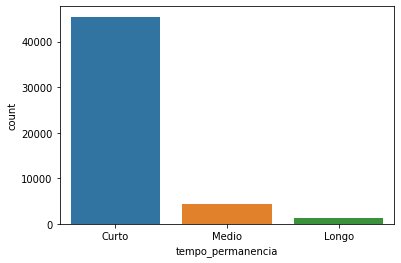

In [12]:
sns.countplot(x='tempo_permanencia', data=clean_data)

Podemos verificar que nossa base possui uma quantia muito mais significativa de pacientes que ficaram pouco tempo nas dependencias do hospital.

In [13]:
#importando a biblioteca de plotagem do plotly 
import plotly.express as px

(array([  127.,   994.,  6875., 15274., 12905.,  9268.,  3904.,  1545.,
          311.,    20.]),
 array([  1. ,  11.4,  21.8,  32.2,  42.6,  53. ,  63.4,  73.8,  84.2,
         94.6, 105. ]),
 <BarContainer object of 10 artists>)

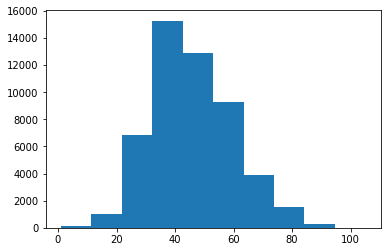

In [14]:
#Gerando alguns histogramas, para analise de cada parametro da base de dados
plt.hist(x = clean_data['IDADE'])

Podemos validar através do gráfico acima que nosso perfil de paciente, caso fosse divido em faixas etárias, será concentrado nos adultos (18 até 64 anos)

(array([38077.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 13146.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

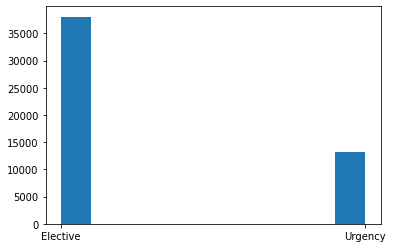

In [15]:
plt.hist(x = clean_data['CARATER'])

(array([36886.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 14337.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

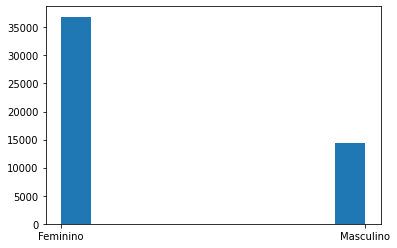

In [16]:
plt.hist(x = clean_data['GENERO'])

### Após nossa análise explorátoria dos dados, podemos verificar que há quantidades significativas de perfis de pacientes, podendo nos dizer que talvez tenhamos um grupo com caracteristicas bem parecidas entre sí. Ou que o hospital é utilizado por um determinado tipo de perfil de paciente.

#### Agora vamos preparar nossos dados para gerar modelos de treinamento. Para isso importaremos algumas bibliotecas

In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pickle

Nesta etapa de nosso modelo estamos transformando os dados que são rótulos em números, como um De x Para das informações

In [18]:
#Separando valores previsores e valor de previsão do nosso modelo
X_pacient = clean_data.iloc[:,0:4].values

y_pacient = clean_data.iloc[:, 4].values

#Transformando Labels
label_carater = LabelEncoder()
label_cid = LabelEncoder()
label_genero = LabelEncoder()

X_pacient[:,0] = label_carater.fit_transform(X_pacient[:,0])
X_pacient[:,1] = label_cid.fit_transform(X_pacient[:,1])
X_pacient[:,3] = label_genero.fit_transform(X_pacient[:,3])

#verificando como ficou nossos dados após o LabelEncoder
X_pacient[0]

array([0, 1, 46, 0], dtype=object)

Realizando a normalização dos dados para melhor interpretação dos dados ao longo da execução dos modelos

In [19]:
#padronizando dados com o StandarScaler
scaler_pacient = StandardScaler()
X_pacient = scaler_pacient.fit_transform(X_pacient)

Criando as variáveis de teste e de treinamento, fazendo a divisão de 70% dos dados treino e 30% dos dados teste

In [20]:
X_pacient_train, X_pacient_test, y_pacient_train, y_pacient_test = train_test_split(X_pacient, y_pacient, test_size=0.3, random_state=0)

X_pacient_train.shape, y_pacient_train.shape

((35856, 4), (35856,))

Podemos verificar a quantidade de registros destinados para a carga de teste do modelo

In [21]:
X_pacient_test.shape, y_pacient_test.shape

((15367, 4), (15367,))

In [22]:
#Salvando nossa base no arquivo pkl para treinamento do modelo
with open('pacient.pkl', mode ='wb') as f:
    pickle.dump([X_pacient_train,y_pacient_train,X_pacient_test,y_pacient_test],f)
    

### Agora após nossos dados preparados no pre-processamento, iremos gerar alguns modelos para analise dos resultados

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
import pickle
import pandas as pd

Realizando a leitura dos dados após o preprocessamento para aplicar o algoritmo

In [24]:
with open('pacient.pkl', mode='rb') as f:
  X_pacient_train, y_pacient_train, X_pacient_test, y_pacient_test = pickle.load(f)

X_pacient_train.shape, y_pacient_train.shape

((35856, 4), (35856,))

### Aplicando algoritmo de Naive Bayes teremos o seguinte resultado

In [25]:
naive_bayes_pacient = GaussianNB()
naive_bayes_pacient.fit(X_pacient_train, y_pacient_train)

GaussianNB()

Após execução da função de predição, veremos os resultados gerados pela execução do código.

In [26]:
predict = naive_bayes_pacient.predict(X_pacient_test)
predict

array(['Curto', 'Curto', 'Curto', ..., 'Curto', 'Curto', 'Longo'],
      dtype='<U5')

Agora iremos analisar a taxa de acurácia do algoritmo

In [27]:
accuracy_score(y_pacient_test, predict)

0.8728444068458385

Através da matriz de confusão podemos verificar o quanto foi de cada classe previsora foi corretamente classificado pelo algoritmo

0.8728444068458385
              precision    recall  f1-score   support

       Curto       0.96      0.89      0.93     13642
       Longo       1.00      1.00      1.00       401
       Medio       0.37      0.66      0.47      1324

    accuracy                           0.87     15367
   macro avg       0.78      0.85      0.80     15367
weighted avg       0.91      0.87      0.89     15367



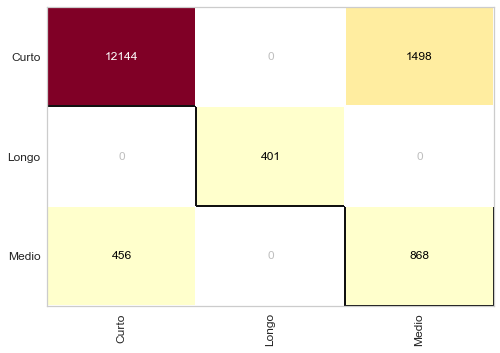

In [28]:
cm = ConfusionMatrix(naive_bayes_pacient)
cm.fit(X_pacient_train, y_pacient_train)
print(cm.score(X_pacient_test, y_pacient_test))

print(classification_report(y_pacient_test, predict))

### Aplicando o algoritmo de Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

Instanciando objeto para utilização do modelo de Random Forest de treinamento

In [30]:
random_forest_pacient = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest_pacient.fit(X_pacient_train, y_pacient_train)

random_forest_pacient.classes_

array(['Curto', 'Longo', 'Medio'], dtype=object)

Exibição das classes que queremos classificar com os modelos

Após execução da função de predição, veremos os resultados gerados pela execução do código.

In [31]:
predict = random_forest_pacient.predict(X_pacient_test)
predict

array(['Curto', 'Curto', 'Curto', ..., 'Curto', 'Curto', 'Longo'],
      dtype=object)

Agora iremos analisar a taxa de acurácia do algoritmo

In [32]:
accuracy_score(y_pacient_test, predict)

0.9157285091429687

Através da matriz de confusão podemos verificar o quanto foi de cada classe previsora foi corretamente classificado pelo algoritmo

              precision    recall  f1-score   support

       Curto       0.92      0.99      0.95     13642
       Longo       1.00      1.00      1.00       401
       Medio       0.55      0.13      0.21      1324

    accuracy                           0.92     15367
   macro avg       0.82      0.71      0.72     15367
weighted avg       0.89      0.92      0.89     15367



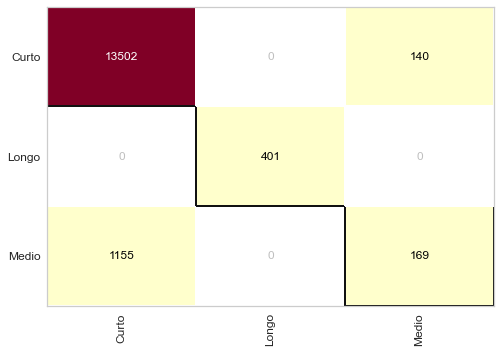

In [33]:
cm = ConfusionMatrix(random_forest_pacient)
cm.fit(X_pacient_train, y_pacient_train)
cm.score(X_pacient_test, y_pacient_test)

print(classification_report(y_pacient_test, predict))

### Aplicando algoritmo de Regressão Logística

In [34]:
from sklearn.linear_model import LogisticRegression

Instanciando objeto para utilização do modelo de Regressão Logística de treinamento

In [35]:
logistic_pacient = LogisticRegression(random_state=1)
logistic_pacient.fit(X_pacient_train, y_pacient_train)

logistic_pacient.intercept_
logistic_pacient.coef_

array([[-0.91086876,  1.09326388, -0.19531099, -0.03326029],
       [ 0.05791725, -2.0237852 ,  0.07853157,  0.02686446],
       [ 0.85295151,  0.93052132,  0.11677942,  0.00639583]])

Após execução da função de predição, veremos os resultados gerados pela execução do código.

In [36]:
predict = logistic_pacient.predict(X_pacient_test)
predict

array(['Curto', 'Curto', 'Curto', ..., 'Curto', 'Curto', 'Longo'],
      dtype=object)

Agora iremos analisar a taxa de acurácia do algoritmo

In [37]:
accuracy_score(y_pacient_test, predict)

0.9165744777770547

Através da matriz de confusão podemos verificar o quanto foi de cada classe previsora foi corretamente classificado pelo algoritmo

0.9165744777770547
              precision    recall  f1-score   support

       Curto       0.92      1.00      0.95     13642
       Longo       1.00      1.00      1.00       401
       Medio       0.65      0.07      0.12      1324

    accuracy                           0.92     15367
   macro avg       0.86      0.69      0.69     15367
weighted avg       0.90      0.92      0.88     15367



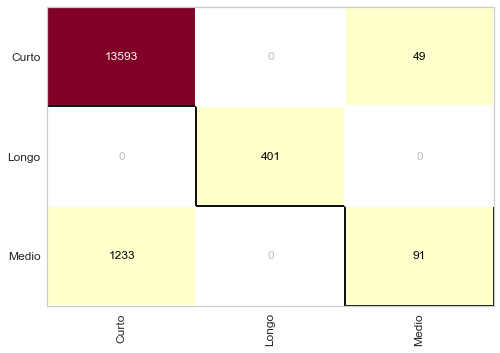

In [38]:
cm = ConfusionMatrix(logistic_pacient)
cm.fit(X_pacient_train, y_pacient_train)
print(cm.score(X_pacient_test, y_pacient_test))

print(classification_report(y_pacient_test, predict))